In [1]:
import theano
theano.config.exception_verbosity='high'

In [2]:
import converter
from model import SSDModel
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
ROOT = '/home/nik-kochetov/work/'

Using Theano backend.


In [3]:
model = SSDModel()

(37, 37, 24, 1)
(37, 37, 6, 1)
(18, 18, 24, 1)
(18, 18, 6, 1)
(7, 7, 24, 1)
(7, 7, 6, 1)
(5, 5, 24, 1)
(5, 5, 6, 1)
(3, 3, 24, 1)
(3, 3, 6, 1)
(1, 1, 24, 1)
(1, 1, 6, 1)


In [4]:
path = os.path.join(ROOT, 'models_2', 'model.21-12-2017.ssd.05.hdf5')
model.model.load_weights(path)

In [5]:
imgs_path = os.path.join(ROOT, 'Barcodes', 'Images')
imgs = os.listdir(imgs_path)
print imgs[:10]

['Code_39_Check_0313_58.jpg', 'Code_39_0146_7.jpg', 'EAN_13_5sup_0083_4.jpg', 'Interleaved_2_of_5_(3)_0125_128.jpg', 'Code_39_0215_10.jpg', 'Code_39_0382_41.jpg', 'Code_128C_0311_31.jpg', 'Code_39_0198_11.jpg', 'Code_128A_0116_15.jpg', 'Code_39_Check_0173_56.jpg']


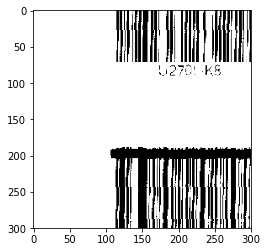

In [81]:
#img_name = '../../Images/r_0.jpg' 
img_name = imgs[4]
img = np.asarray(Image.open(os.path.join(imgs_path, img_name)))
imshow(img)

In [82]:
img.shape

(300, 300, 3)

In [83]:
tensor = model.model.predict(img.reshape([1]  + list(img.shape)))

In [84]:
for val in tensor:
    print val.shape

(1, 37, 37, 24, 1)
(1, 18, 18, 24, 1)
(1, 7, 7, 24, 1)
(1, 5, 5, 24, 1)
(1, 3, 3, 24, 1)
(1, 1, 1, 24, 1)
(1, 37, 37, 6, 1)
(1, 18, 18, 6, 1)
(1, 7, 7, 6, 1)
(1, 5, 5, 6, 1)
(1, 3, 3, 6, 1)
(1, 1, 1, 6, 1)


In [91]:
reload(converter)
from converter import Converter

conv = Converter(os.path.join(ROOT, 'Barcodes', 'Rects'))
confs, rects = conv.restore_rects_batch(tensor, model, top=3)[0]
print confs
for rect in rects:
    rect.dump()

[[ 0.99778026]
 [ 0.99643254]
 [ 0.97444999]]
l=0.251499823288,t=1.04358795519,r=0.938532786413,b=1.2110084701
l=-0.148745124078,t=0.958017202023,r=2.05848490205,b=1.44549656034
l=0.919185907023,t=0.530996166733,r=1.95366796377,b=1.54941961065


l=75.4499469863,t=313.076386558,r=281.559835924,b=363.30254103
None
l=-44.6235372234,t=287.405160607,r=617.545470616,b=433.648968102
None
l=275.755772107,t=159.29885002,r=586.100389132,b=464.825883196
None


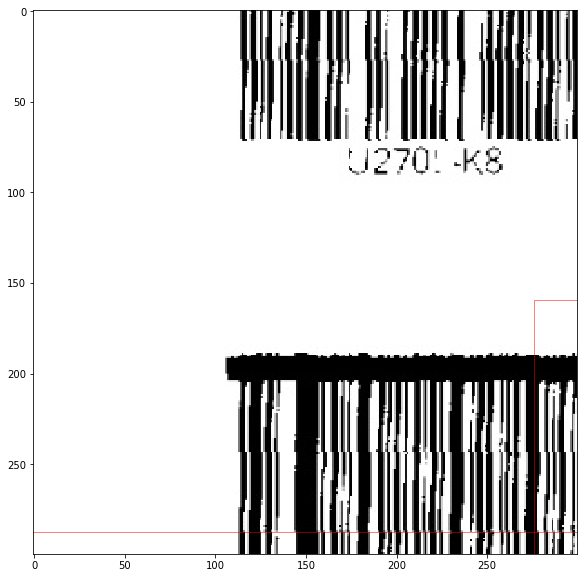

In [92]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 10))

# Display the image
ax.imshow(img)

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)


for rect in rects:
    # Create a Rectangle patch
    rr = rect.copy()
    rr.stretch(300, 300)
    print rr.dump()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)

plt.show()